<a href="https://colab.research.google.com/github/Mikolajkunka/Missp/blob/main/competition/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic: Machine Learning From Disaster**

Po wykonaniu kursu z podstaw uczenia maszynowego moim zadaniem było podjęcię się jednego z wyzwań dostępnych na stronie https://www.kaggle.com/competitions. Podjąłem się rozwiązania konkursu o nazwie ,,Titanic". Poległo ono na przewidzeniu, którzy pasażerowie ze zbioru testowego przeżyją katastrofę oraz sprawdzeniu skuteczności swoich przewidywań w postaci procentowego wyniku określającego ile pasażerów udało mi się przewidzieć zgodnie z faktycznym stanem podczas katastrofy w 1912 roku. Do określenia zmennych decyzyjnych wpływających na przeżywalność posłużył plik treningowy pobrany ze strony. Następnie utworzono model mający za zadanie poprawne przewidzenie losów pasażerów.

In [ ]:
#import bibliotek pandas oraz bibliotek pozwalających na graficzne przedstawienie danych
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
#
import io
from google.colab import files
uploaded = files.upload()

#Ścieżka do wczytania pliku
titanic_train = io.BytesIO(uploaded['train.csv'])

#Wczytanie pliku do zmiennej train
train = pd.read_csv(titanic_train)
train_shape=train.shape
print(train_shape)

titanic_test = io.BytesIO(uploaded['test.csv'])

#Wczytanie pliku do zmiennej train
test = pd.read_csv(titanic_test)
test_shape = test.shape
print(test_shape)

Saving test.csv to test (1).csv
Saving train.csv to train (2).csv
(891, 12)
(418, 11)


In [154]:
#Sprawdzenie danych z pliku treningowego dla dwóch osób
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


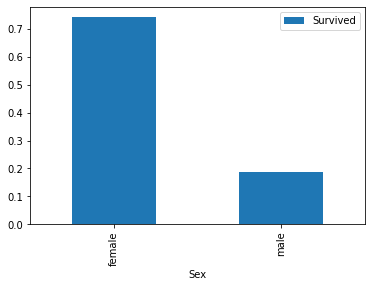

In [167]:
#Pierwsze przedstawienie danej na temat relacji pomiędzy płcią a przeżywalnością
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

sex_pivot.plot.bar()
plt.show()

Widzimy, że przeżywalność mężczyzn jest około 4 krotnie mniejsza niż przeżywalność kobiet.

In [164]:
#Podział danych na dane liczbowe oraz dane tekstowe
dane1 = train[['Age','SibSp','Parch','Fare']]
dane2 = train[['Survived','Pclass','Ticket','Cabin','Embarked']]

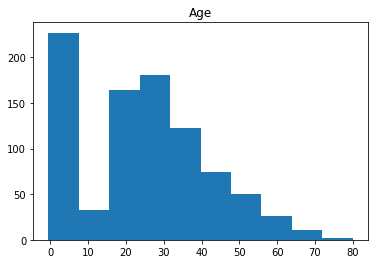

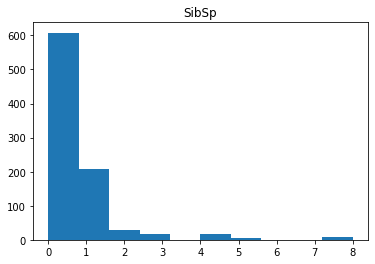

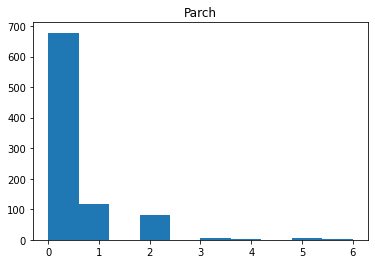

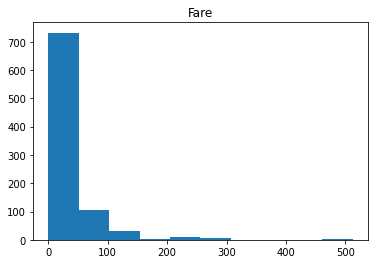

In [165]:
for i in dane1.columns: # pętla wyświetlająca dane liczbowe
    plt.hist(dane1[i])
    plt.title(i)
    plt.show() #inicjalizacja wykresów

In [159]:
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,23.539162,22.117887,0.329690,0.553734
1,23.958099,48.395408,0.464912,0.473684


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


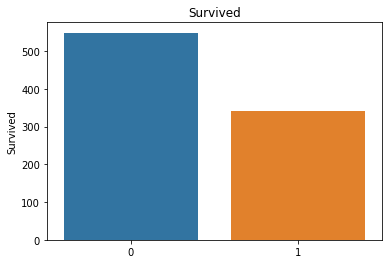

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


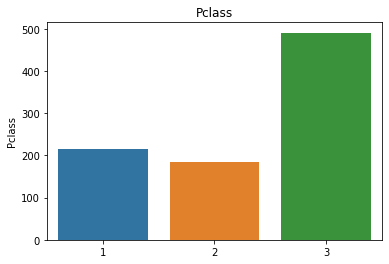

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


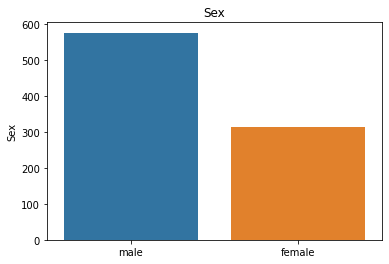

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


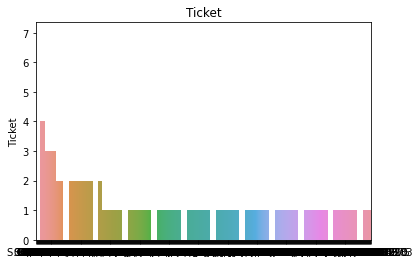

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


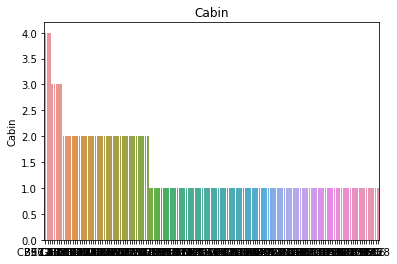

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


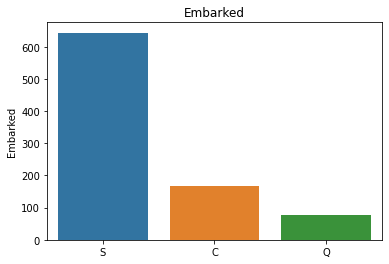

In [166]:
for i in dane2.columns:
    sns.barplot(dane2[i].value_counts().index, dane2[i].value_counts()).set_title(i)
    plt.show()

In [162]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print('_'*30)
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('_'*30)
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
______________________________
Sex       female  male
Survived              
0             81   468
1            233   109
______________________________
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Na podstawie danych liczbowych możemy dojść do wniosku, że:

1. Kobiety mają większe szanse na przeżycie.

2. Wyższa opłata wniesiona za rejs zwiększą szanse przeżycia.

3.Jeśli posiadamy rodzeństwo to Nasza szansa przeżycia maleje.

4. Jeśli posiadamy dzieci to istnieje większą szansa, że ujdziemy z życiem z katastrofy.

5. Im w wyższej klasie mieliśmy okazje podróżować tym Nasza szansa na uratowanie rośnie.


In [ ]:
column_name = "Pclass"
df = train
dummies = pd.get_dummies(df[column_name],prefix=column_name)
dummies.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [163]:
#Utworzenie dodatkowych danych w celu łatwiejszego obliczenia

def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train.head(2) #wyświetlenie danych


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

train.head(2)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,0,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0,0,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1,0,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0


In [170]:
#import biblioteki pozwalającej skorzystać z metody LogisticRegression
from sklearn.linear_model import LogisticRegression


In [171]:
lr = LogisticRegression() # inicjalizacja funkcji rozwiązującej problem

In [172]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [179]:
# import biblioteki przy pomocy, której dzielimy dane na dane treningowe oraz sprawdzające
from sklearn.model_selection import train_test_split

columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']

X = train[columns]
y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2,random_state=0)

holdout = test # from now on we will refer to this
               # dataframe as the holdout data

In [180]:
train_X.shape

(712, 20)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_y, predictions)
pd.DataFrame(conf_matrix, columns=['Survived', 'Died'], index=[['Survived', 'Died']])


,Survived,Died
Survived,96,14
Died,20,49


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10)
np.mean(scores) 

#sprawdzenie wartości błędu pomiędzy przewidywaniem a danymi testowymi

0.8024719101123596

In [168]:
# Making Predictions on Unseen Data
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']

holdout.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Pclass_1,Pclass_2,Pclass_3,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [ ]:
holdout_ids = holdout["PassengerId"]

#Stworzenie DataFrame z informacją o numerze pasażera oraz indormacji czy przeżyje katastrofę
#0 oznacza śmierć, natomiast 1 ujście żywym z katastrofy
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

#wygenerowanie danych do pliku csv, który pojawia się w zakładce Pliki po lewej stronie
submission.to_csv('titanic_submission.csv', index=False)


Po sprawdzeniu swoich wyników uzyskałem komunikat o tym, że metoda logistic regression dała mi poprawne przewidzenie losów pasażerów na poziomie 76%.

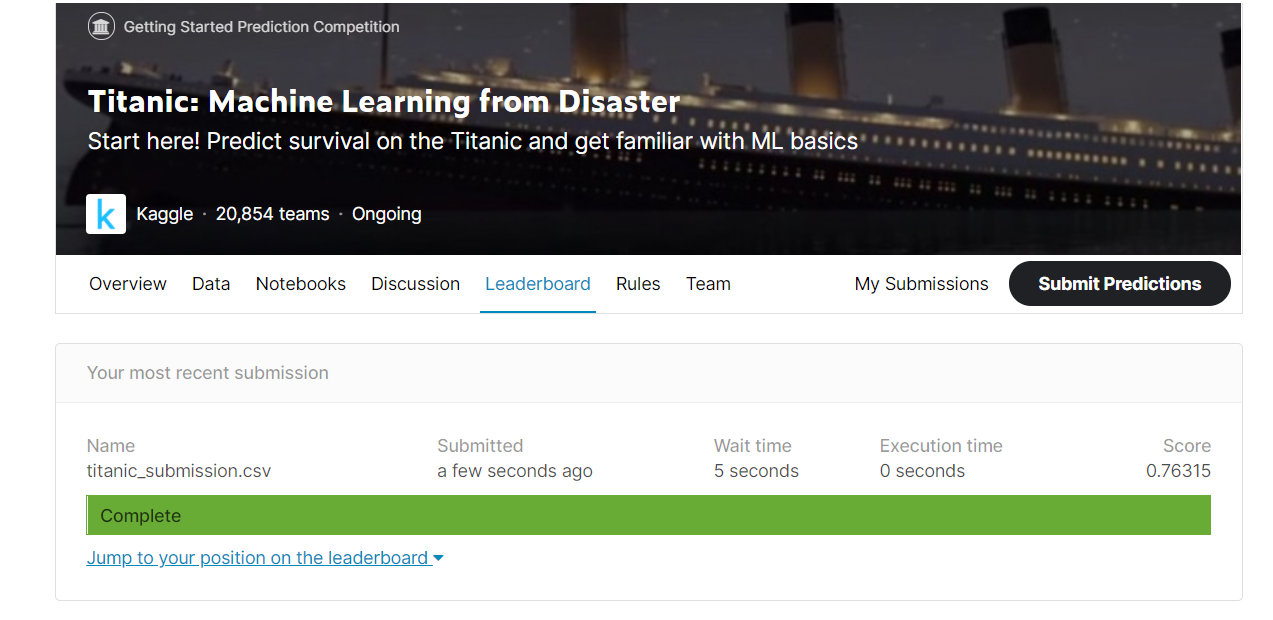